# DNN: the Basics

In this notebook, we will learn the basics of a Deep Neural Network (DNN) based on [TensorFlow](https://www.tensorflow.org/), an open source platform for machine learning. 

We will use the `fashion-mnist` dataset that is useful for quick examples when learning the basics. We will use the same principles to work with more relevant datasets in the other exercises.

---

In [1]:
# tensorflow
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

# helpers
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

---

## Step 0: Load the Dataset

To start with we set up our data and look at the dataset.

In [2]:
# function to plot an image in a subplot
def subplot_image(image, label, nrows=1, ncols=1, iplot=0):
    plt.subplot(nrows, ncols, iplot + 1)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(label)
    plt.xticks([])
    plt.yticks([])

In [3]:
# load dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# normalise images
train_images = train_images / 255.0
test_images = test_images / 255.0

# string labels
string_labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# print info
print("number of training data: %d" % len(train_labels))
print("number of test data: %d" % len(test_labels))
print("image pixels: %s" % str(train_images[0].shape))

number of training data: 60000
number of test data: 10000
image pixels: (28, 28)


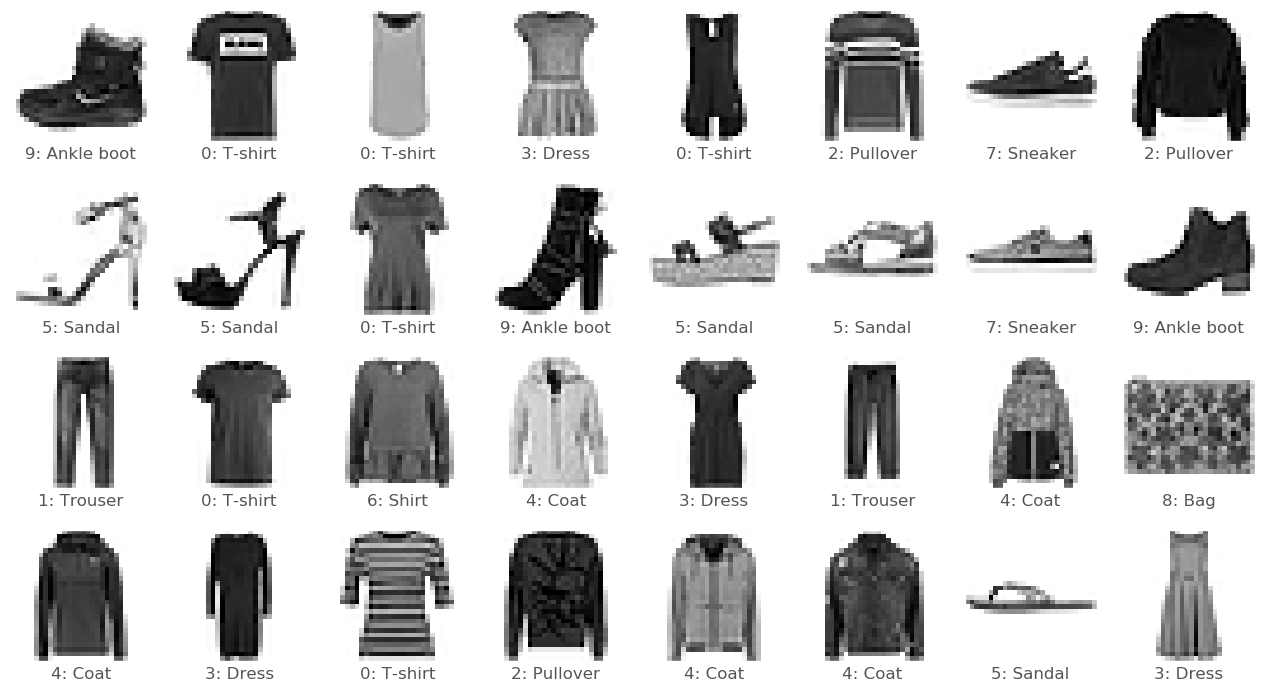

In [4]:
# plot images and labels
nrows = 4
ncols = 8
plt.figure(dpi=100, figsize=(ncols * 2, nrows * 2.2))
for idata in np.arange(nrows * ncols):
    title = "%d: %s" % (train_labels[idata], string_labels[train_labels[idata]])
    subplot_image(train_images[idata], title, nrows, ncols, idata)
plt.show()

---

## Step 1: Build the Network Architecture

We are going to build a simple multi-layer perceptron to classify the `fashion-mnist` dataset. Our first network looks like this:


![dense.jpeg](https://i.ibb.co/0yrVL28/dnn.png)



To build this network we need an input layer, the hidden layers (only one here) and an output layer. All the layers are `Dense` layers in this example.


### The input layer

We first need to determine the dimensionality of the input layer. In this case we flatten (using a `Flatten` layer) the images above and feed them to the network. As they are 28 $\times$ 28 images, the input size is 784.


### The hidden layers

For this network we will use just one hidden layer, which is a `Dense` layer. Here we use `ReLU` as its activation function:

> $R(x)=\max(0,x)$

**Notes**: Different activation functions are used for different tasks. Remember that `ReLU` generally performs well for training a network, but it can *only* be used in the hidden layers.


### The output layer

We can cast categorical data as a "one-hot" vector. In this case, we have a vector of length 10 on the output side, where each element corresponds to a type of apparel. We want the values to ideally be either 0 or 1, depending on the resultant label, so we use `sigmoid` as the activation function of the output layer:

> $S(x) = \dfrac{1}{1 + e^{-x}}$

In [5]:
# build the network architecture
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


We can take a look at the summary of the model using `model.summary()`. The number of trainable parameters of a layer = $P\times N+P$, where $P$ is the size of its precedent layer and $N$ its own size. Here $P\times N$ accounts for the weights of the $P\times N$ connections and $P$ for the biases of this layer.

In [6]:
# print summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


---

## Step 2: Compile the Model

Now we compile the model. This is where we specify all sorts of hyperparameters associated with the model. The most important ones are described here.

### Loss

The loss is the objective function to be minimised during training. Gradients of the loss with respect to network weights are used to backpropagate and update the weights. In this case, we will use `SparseCategoricalCrossentropy` -- the term *sparse* means that the output vector is sparse, with many more zeors than ones in the one-hot encoding.


### Optimiser

An optimiser is an algorithm determining how the weights are updated based on the loss. *Adam* is usually a good choice at the beginning. 


### Metric

The metrics do not affect the training result but monitor the training process to get a sense of how the model is doing. We can also use them to choose between models at the end. In our case we will monitor the `accuracy`.

In [7]:
# compile the model
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

---

## Step 3 Train the Model

Now we can finally start to train the model on our data.

The model is trained using the `fit` method. We need to specificy a few extra parameters here:

### Epochs

It is the number of times that the model will run through the entire training set during training.


### Batch size

It determines how many images will be used at a time to update the weights. Backpropagation uses the mean of the losses across the batch to update weights. Generally larger batches will train quicker and smoother, but can become trapped in local minima. Generally, batch sizes between 16 - 256 are used, depending on data heterogeniety, memory available etc..

### Validation data
We send the test images and labels for validation during the training. 

In [8]:
# train the model
training_history = model.fit(train_images, train_labels, epochs=50, batch_size=32, 
                             validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
60000/60000 [==============================] - 2s 32us/sample - loss: 0.5283 - acc: 0.8159 - val_loss: 0.4644 - val_acc: 0.8378
Epoch 2/50
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3963 - acc: 0.8588 - val_loss: 0.3959 - val_acc: 0.8587
Epoch 3/50
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3531 - acc: 0.8733 - val_loss: 0.3778 - val_acc: 0.8641
Epoch 4/50
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3281 - acc: 0.8798 - val_loss: 0.3600 - val_acc: 0.8684
Epoch 5/50
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3064 - acc: 0.8875 - val_loss: 0.3540 - val_acc: 0.8711
Epoch 6/50
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2907 - acc: 0.8932 - val_loss: 0.3651 - val_acc: 0.8673
Epoch 7/50
60000/60000

### Check training history

Plot the accuracy and loss against training epoch for both the training and test data. Notice that the accuracy for the training and test data diverge as the model trains. This is a classic symptom of *overfitting*. 

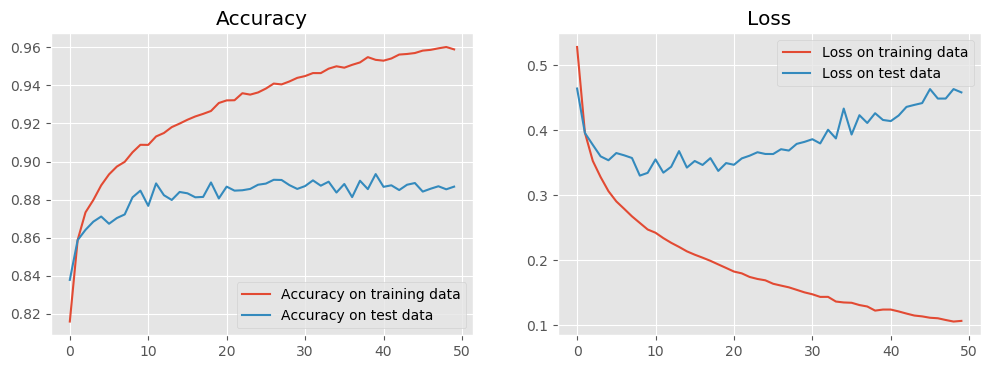

In [9]:
# plot accuracy
plt.figure(dpi=100, figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['acc'], label='Accuracy on training data')
plt.plot(training_history.history['val_acc'], label='Accuracy on test data')
plt.legend()
plt.title("Accuracy")

# plot loss
plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'], label='Loss on training data')
plt.plot(training_history.history['val_loss'], label='Loss on test data')
plt.legend()
plt.title("Loss")
plt.show()

---

## Step 4: Rgularise and Re-train

As we saw above, the model was doing okay, but was overfitting a bit. We can use `dropout` layers to mitigate against overfitting. Here we will rebuild our model and include some dropout between the hidden and output layer. We can see if this negates the overfitting.

In [10]:
# define the model
model_reg = Sequential()
model_reg.add(Flatten(input_shape=(28, 28)))
model_reg.add(Dense(128, activation='relu'))
model_reg.add(Dropout(0.4))
model_reg.add(Dense(10, activation='sigmoid'))

# compile the model
model_reg.compile(optimizer='adam',
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

In [11]:
# train the model
training_history_reg = model_reg.fit(train_images, train_labels, epochs=50, batch_size=32, 
                                     validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.6343 - acc: 0.7779 - val_loss: 0.4803 - val_acc: 0.8226
Epoch 2/50
60000/60000 [==============================] - 2s 34us/sample - loss: 0.4513 - acc: 0.8375 - val_loss: 0.4170 - val_acc: 0.8507
Epoch 3/50
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4136 - acc: 0.8502 - val_loss: 0.4048 - val_acc: 0.8512
Epoch 4/50
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3956 - acc: 0.8557 - val_loss: 0.3801 - val_acc: 0.8629
Epoch 5/50
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3803 - acc: 0.8619 - val_loss: 0.3742 - val_acc: 0.8662
Epoch 6/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3703 - acc: 0.8636 - val_loss: 0.3644 - val_acc: 0.8694
Epoch 7/50
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3582 - acc: 0.8685 - val_loss: 0.

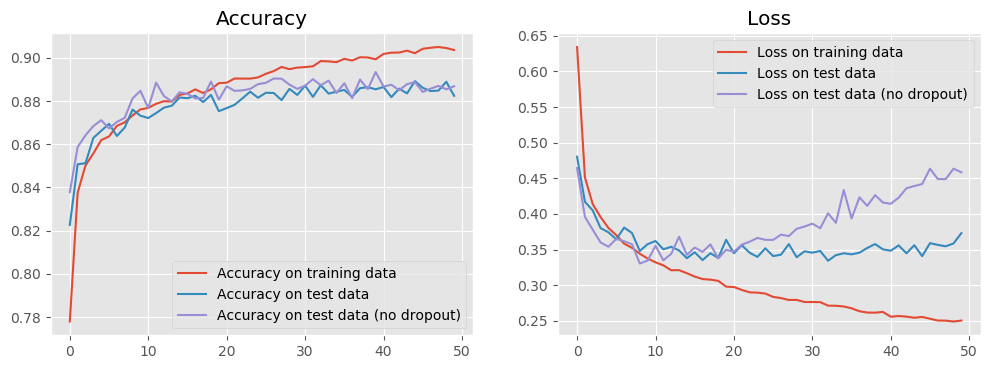

In [12]:
# plot accuracy
plt.figure(dpi=100, figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_history_reg.history['acc'], label='Accuracy on training data')
plt.plot(training_history_reg.history['val_acc'], label='Accuracy on test data')
plt.plot(training_history.history['val_acc'], label='Accuracy on test data (no dropout)')
plt.legend()
plt.title("Accuracy")

# plot loss
plt.subplot(1, 2, 2)
plt.plot(training_history_reg.history['loss'], label='Loss on training data')
plt.plot(training_history_reg.history['val_loss'], label='Loss on test data')
plt.plot(training_history.history['val_loss'], label='Loss on test data (no dropout)')
plt.legend()
plt.title("Loss")
plt.show()

---

## Step 5: Make Predictions

Finally, we can use our trained model to make predictions. We will some show wrong predictions for the test data, from which we may get some idea about what kind of images baffles our model.

In [13]:
# use test images to predict
pred_lables = model_reg.predict(test_images).argmax(axis=1)

number of test data: 10000
number of wrong predictions: 1176


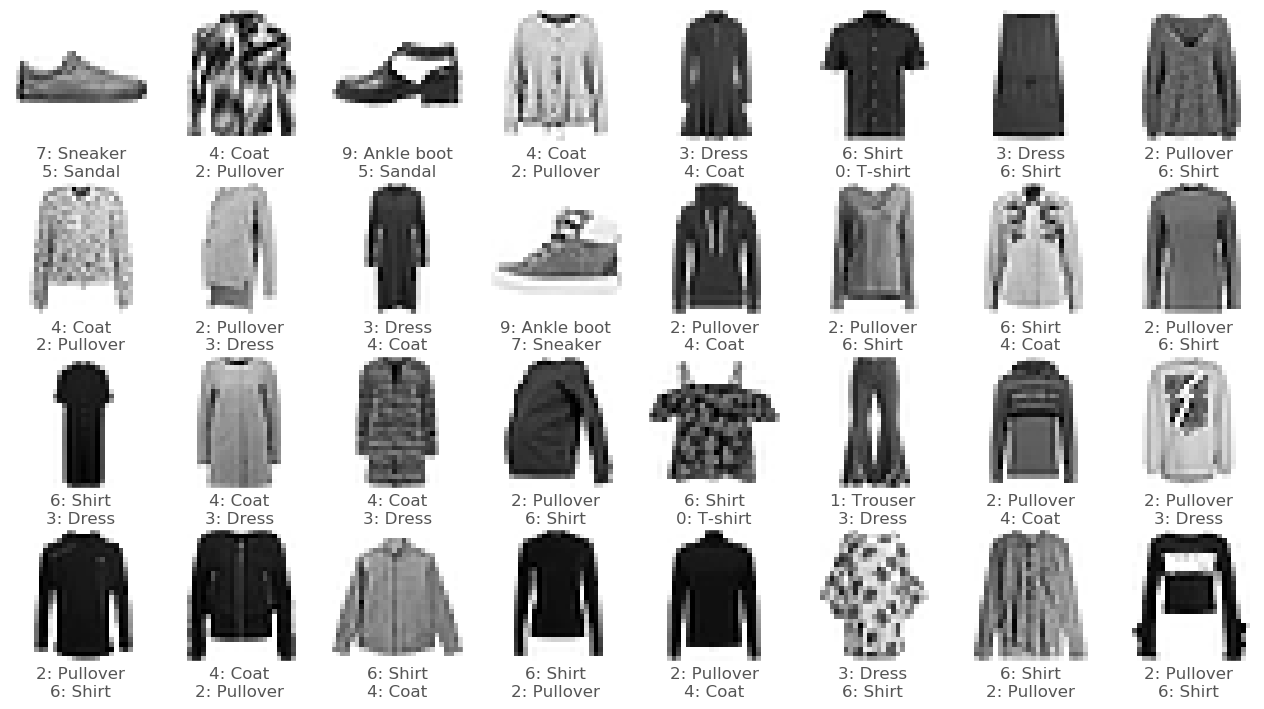

In [14]:
# get the wrong predictions
wrong = np.where(pred_lables != test_labels)[0]
print("number of test data: %d" % test_labels.size)
print("number of wrong predictions: %d" % wrong.size)

# plot the wrong predictions
nrows = 4
ncols = 8
plt.figure(dpi=100, figsize=(ncols * 2, nrows * 2.2))
for iplot, idata in enumerate(wrong[0:(nrows * ncols)]):
    title = "%d: %s\n%d: %s" % (test_labels[idata], string_labels[test_labels[idata]], 
                                pred_lables[idata], string_labels[pred_lables[idata]])
    subplot_image(test_images[idata], title, nrows, ncols, iplot)
plt.show()

## Step 6: Exercises

* change the hyperparameters in `model.compile()` and `model.fit()` to see their effects; 
* use two hidden layers (with dropout), e.g., respectively with sizes 256 and 64, and see whether the accuracy can be improved;
* change the output from binary to probability, i.e., the one-hot vector represents the probability that an image belongs to a class; this can be achieved by 1) removing `activation='sigmoid'` from the output layer and 2) appending a `keras.layers.Softmax()` layer after the trained model:
```python
probability_model = keras.Sequential([model_reg, keras.layers.Softmax()])
```